### Import Libaries

In [1]:
import seaborn as sns
import pandas as pd

### Import Dataset

In [2]:
tips = sns.load_dataset('tips')

### Data Queries

#### Understanding the dataset

In [3]:
# First 5 rows
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
# Last 5 rows
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


#### Which weekdays are present in the dataset?

In [5]:
# To determine which days customers are giving tips
tips.day.unique()

[Sun, Sat, Thur, Fri]
Categories (4, object): [Sun, Sat, Thur, Fri]

#### What values for 'time' are present in the dataset?

In [6]:
# To determine when the restaurant is open for operation
tips.time.unique()

[Dinner, Lunch]
Categories (2, object): [Dinner, Lunch]

#### How many times are 'dinner' and 'lunch' present? 

In [7]:
# To see whether more people arrive for lunch or dinner
tips.time.value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

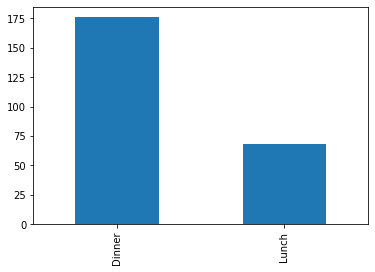

In [9]:
# Plot of this query 
tips.time.value_counts().plot(kind='bar')

####  What is the proportion of dinner to lunch in % form?

In [8]:
# Creates the proportion as a value
tips.time.value_counts(normalize=True)*100

Dinner    72.131148
Lunch     27.868852
Name: time, dtype: float64

#### Do people pay more tips during lunch or dinner? 

In [9]:
# The average tip payed during lunch and dinner time
tips.groupby(['time'])['tip'].mean()

time
Lunch     2.728088
Dinner    3.102670
Name: tip, dtype: float64

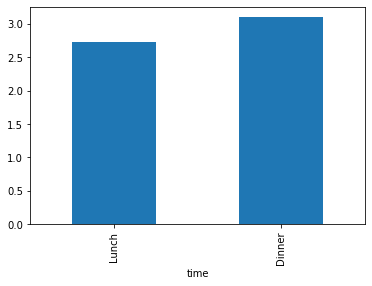

In [12]:
# Plot of this query
tips.groupby(['time'])['tip'].mean().plot.bar()

#### How do the average tips vary based on the following columns?

In [10]:
# The average tip payed based on smoker/non-smoker
tips.groupby(['smoker'])['tip'].mean()

smoker
Yes    3.008710
No     2.991854
Name: tip, dtype: float64

In [11]:
# The average tip payed based on gender
tips.groupby(['sex'])['tip'].mean()

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

In [12]:
# The average tip payed based on the day of the week
tips.groupby(['day'])['tip'].mean()

day
Thur    2.771452
Fri     2.734737
Sat     2.993103
Sun     3.255132
Name: tip, dtype: float64

In [13]:
# The average tip payed based on group size
tips.groupby(['size'])['tip'].mean()

size
1    1.437500
2    2.582308
3    3.393158
4    4.135405
5    4.028000
6    5.225000
Name: tip, dtype: float64

In [14]:
 # The average tip payed based on smoker type and gender
tips.groupby(['smoker','sex'])['tip'].mean()

smoker  sex   
Yes     Male      3.051167
        Female    2.931515
No      Male      3.113402
        Female    2.773519
Name: tip, dtype: float64

In [15]:
# Pivot table of average tip payed based on smoker type and gender
tips.groupby(['smoker','sex'])['tip'].mean().unstack()

sex,Male,Female
smoker,,
Yes,3.051167,2.931515
No,3.113402,2.773519


#### What portion of the total bill is the tip payed? 

In [16]:
# Determines what portion of the total bill is the tip 
tips['tip_pct'] = tips.tip / tips.total_bill

In [17]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


#### Correlation between the total bill and tips

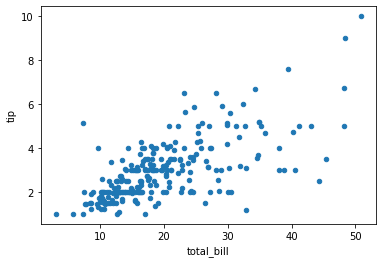

In [18]:
# So determine if the tip changes based on total bill
tips.plot.scatter(x='total_bill',y='tip')

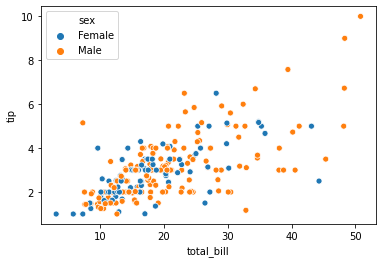

In [19]:
# To determine if the tip changes based on gender
sns.scatterplot(x='total_bill',y='tip',data=tips,hue='sex')

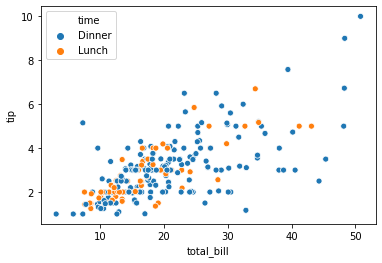

In [20]:
# To determine if the tip changes based on time
sns.scatterplot(x='total_bill',y='tip',data=tips,hue='time')

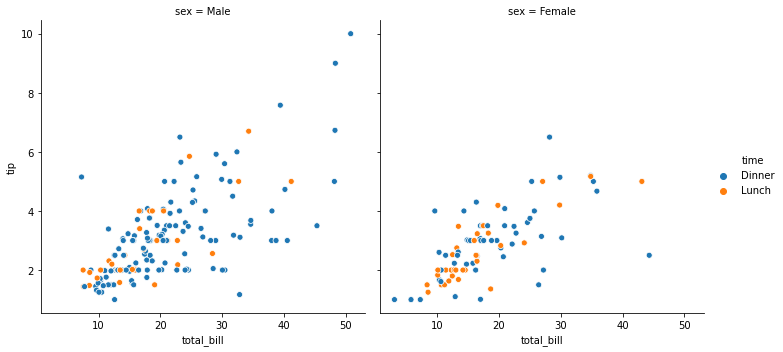

In [24]:
# To determine if the tip changes based on time, and split by gender
sns.relplot(x='total_bill',y='tip',data=tips,col='sex',hue='time')

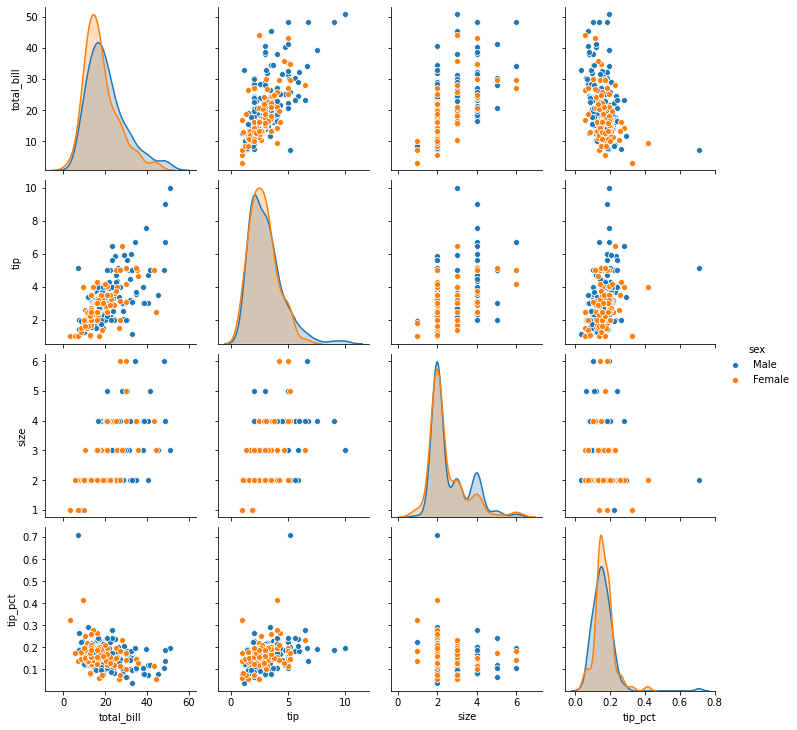

In [30]:
# Correlation and distribution of each attribute by gender
sns.pairplot(data=tips, hue='sex')